In [1]:
import requests, json
import pandas as pd
from urllib.parse import quote

In [2]:
with open('keys/도로명주소apikey.txt') as file:
    road_key = file.read()

In [4]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'
params2 = f'keyword={quote("경기도미술관")}&resultType=json'
url = f'{base_url}?{params1}&{params2}'
result = requests.get(url).json()

In [5]:
result.keys()

dict_keys(['results'])

In [8]:
result

{'results': {'common': {'errorMessage': '정상',
   'countPerPage': '10',
   'totalCount': '1',
   'errorCode': '0',
   'currentPage': '1'},
  'juso': [{'detBdNmList': '',
    'engAddr': '268 Dongsan-ro, Danwon-gu, Ansan-si, Gyeonggi-do',
    'rn': '동산로',
    'emdNm': '초지동',
    'zipNo': '15385',
    'roadAddrPart2': ' (초지동)',
    'emdNo': '02',
    'sggNm': '안산시 단원구',
    'jibunAddr': '경기도 안산시 단원구 초지동 667 경기도미술관',
    'siNm': '경기도',
    'roadAddrPart1': '경기도 안산시 단원구 동산로 268',
    'bdNm': '경기도미술관',
    'admCd': '4127310700',
    'udrtYn': '0',
    'lnbrMnnm': '667',
    'roadAddr': '경기도 안산시 단원구 동산로 268 (초지동)',
    'lnbrSlno': '0',
    'buldMnnm': '268',
    'bdKdcd': '0',
    'liNm': '',
    'rnMgtSn': '412733191020',
    'mtYn': '0',
    'bdMgtSn': '4127310700106670000034923',
    'buldSlno': '0'}]}}

In [9]:
result['results'].keys()

dict_keys(['common', 'juso'])

In [10]:
result['results']['juso'][0]['roadAddr']

'경기도 안산시 단원구 동산로 268 (초지동)'

In [11]:
ansan_list = '경기도미술관 안산와스타디움 바다향기수목원 최용신기념관 상록수역'.split()
ansan_tour_list = []
for i in range(5):
    params2 = f'keyword={quote(ansan_list[i])}&resultType=json'
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url).json()
    ansan_tour_list.append(result['results']['juso'][0]['roadAddr'])
ansan_tour_list

['경기도 안산시 단원구 동산로 268 (초지동)',
 '경기도 안산시 단원구 화랑로 260 (초지동)',
 '경기도 안산시 단원구 대부황금로 399 (선감동)',
 '경기도 안산시 상록구 샘골서길 64 (본오동)',
 '경기도 안산시 상록구 상록수로 61 (본오동)']

In [12]:
df = pd.DataFrame({
    '명소' : ansan_list, '주소' : ansan_tour_list
})
df

,명소,주소
0,경기도미술관,경기도 안산시 단원구 동산로 268 (초지동)
1,안산와스타디움,경기도 안산시 단원구 화랑로 260 (초지동)
2,바다향기수목원,경기도 안산시 단원구 대부황금로 399 (선감동)
3,최용신기념관,경기도 안산시 상록구 샘골서길 64 (본오동)
4,상록수역,경기도 안산시 상록구 상록수로 61 (본오동)


In [13]:
df.to_csv('data/안산관광명소.csv', index=False)
pd.read_csv('data/안산관광명소.csv')

,명소,주소
0,경기도미술관,경기도 안산시 단원구 동산로 268 (초지동)
1,안산와스타디움,경기도 안산시 단원구 화랑로 260 (초지동)
2,바다향기수목원,경기도 안산시 단원구 대부황금로 399 (선감동)
3,최용신기념관,경기도 안산시 상록구 샘골서길 64 (본오동)
4,상록수역,경기도 안산시 상록구 상록수로 61 (본오동)


In [14]:
with open('keys/카카오apiKey.txt') as file:
    kakao_key = file.read()

In [15]:
base_url1 = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '경기도 안산시 단원구 동산로 268 (초지동)'
url1 = f'{base_url1}?query={quote(addr)}'

In [16]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [17]:
result = requests.get(url1, headers=header).json()
result

{'documents': [{'address': {'address_name': '경기 안산시 단원구 초지동 667',
    'b_code': '4127310700',
    'h_code': '4127357000',
    'main_address_no': '667',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '안산시 단원구',
    'region_3depth_h_name': '초지동',
    'region_3depth_name': '초지동',
    'sub_address_no': '',
    'x': '126.809955311616',
    'y': '37.3250627276111'},
   'address_name': '경기 안산시 단원구 동산로 268',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 안산시 단원구 동산로 268',
    'building_name': '경기도미술관',
    'main_building_no': '268',
    'region_1depth_name': '경기',
    'region_2depth_name': '안산시 단원구',
    'region_3depth_name': '초지동',
    'road_name': '동산로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '126.809955311616',
    'y': '37.3250627276111',
    'zone_no': '15385'},
   'x': '126.809955311616',
   'y': '37.3250627276111'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [18]:
result['documents'][0]['address'].keys()

dict_keys(['address_name', 'b_code', 'h_code', 'main_address_no', 'mountain_yn', 'region_1depth_name', 'region_2depth_name', 'region_3depth_h_name', 'region_3depth_name', 'sub_address_no', 'x', 'y'])

In [19]:
lat = result['documents'][0]['address']['y']
lng = result['documents'][0]['address']['x']
lat, lng

('37.3250627276111', '126.809955311616')

In [23]:
lat_list, lng_list = [], []
for i in range(5):
    base_url1 = 'https://dapi.kakao.com/v2/local/search/address.json'
    addr = '경기도 안산시 단원구 동산로 268 (초지동)'
    url1 = f'{base_url1}?query={quote(df["주소"][i])}'
    result = requests.get(url1, headers=header).json()
    lat = float(result['documents'][0]['address']['y'])
    lng = float(result['documents'][0]['address']['x'])
    lat_list.append(lat)
    lng_list.append(lng)
lat_list

[37.3250627276111,
 37.319477547113,
 37.2250206098629,
 37.2996184754943,
 37.3029804927532]

In [24]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,명소,주소,위도,경도
0,경기도미술관,경기도 안산시 단원구 동산로 268 (초지동),37.325063,126.809955
1,안산와스타디움,경기도 안산시 단원구 화랑로 260 (초지동),37.319478,126.816492
2,바다향기수목원,경기도 안산시 단원구 대부황금로 399 (선감동),37.225021,126.646515
3,최용신기념관,경기도 안산시 상록구 샘골서길 64 (본오동),37.299618,126.862765
4,상록수역,경기도 안산시 상록구 상록수로 61 (본오동),37.302980,126.865417


In [25]:
type(df['위도'][0])

numpy.float64

In [27]:
df.to_csv('data/안산관광명소.csv', index=False)
pd.read_csv('data/안산관광명소.csv')

,명소,주소,위도,경도
0,경기도미술관,경기도 안산시 단원구 동산로 268 (초지동),37.325063,126.809955
1,안산와스타디움,경기도 안산시 단원구 화랑로 260 (초지동),37.319478,126.816492
2,바다향기수목원,경기도 안산시 단원구 대부황금로 399 (선감동),37.225021,126.646515
3,최용신기념관,경기도 안산시 상록구 샘골서길 64 (본오동),37.299618,126.862765
4,상록수역,경기도 안산시 상록구 상록수로 61 (본오동),37.302980,126.865417


In [28]:
df['img_name'] = '01경기도미술관.jpg 02와스타디움.jpg 03바다향기수목원.jpg 04최용신기념관.jpg 05상록수역.jpg'.split()
df

,명소,주소,위도,경도,img_name
0,경기도미술관,경기도 안산시 단원구 동산로 268 (초지동),37.325063,126.809955,01경기도미술관.jpg
1,안산와스타디움,경기도 안산시 단원구 화랑로 260 (초지동),37.319478,126.816492,02와스타디움.jpg
2,바다향기수목원,경기도 안산시 단원구 대부황금로 399 (선감동),37.225021,126.646515,03바다향기수목원.jpg
3,최용신기념관,경기도 안산시 상록구 샘골서길 64 (본오동),37.299618,126.862765,04최용신기념관.jpg
4,상록수역,경기도 안산시 상록구 상록수로 61 (본오동),37.302980,126.865417,05상록수역.jpg


In [31]:
type(df['img_name'][0]), df['img_name'][0]

(str, '01경기도미술관.jpg')

In [26]:
import folium

In [56]:
home_addr = '경기도 안산시 상록구 각골서로2길 11 (본오동)'
url1 = f'{base_url1}?query={quote(home_addr)}'
result = requests.get(url1, headers=header).json()
lat = float(result['documents'][0]['address']['y'])
lng = float(result['documents'][0]['address']['x'])
lat, lng

(37.2939976209959, 126.868309148294)


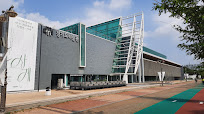
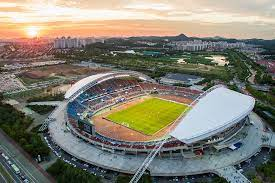
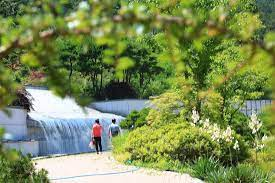
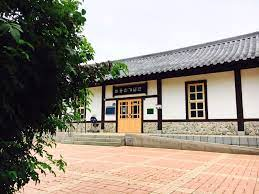
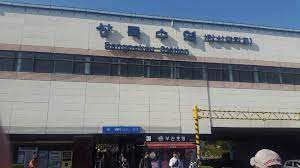
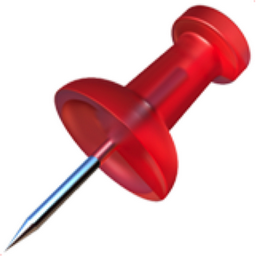

In [57]:
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=11)
for i in df.index:
    folium.Marker(
        location=[df['위도'][i], df['경도'][i]],
        tooltip=f'{df["명소"][i]}<br>{i+1}번째명소',
        popup=folium.Popup(df["주소"][i], max_width=200),
        icon = folium.CustomIcon(f'img/{df["img_name"][i]}', icon_size=(30,30))
    ).add_to(map)
folium.Marker(
    location=[lat, lng],
    tooltip='우리집',
    popup=folium.Popup('경기도 안산시 상록구', max_width=200),
    icon=folium.CustomIcon('data/pushpin.png', icon_size=(30, 30))
).add_to(map)
html_title = '<h3 align="center" style="font-size: 15px">안산관광명소</h3>'
map.get_root().html.add_child(folium.Element(html_title))
map